### **Validation of training and Testing the accuracy**

In [29]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "../")))
from onnxmodel.SecondModel import SecondModel

net = SecondModel(
    dataset_name="imagenet", batch_size=128, learning_rate=0.0005, num_epochs=40
)
net2 = SecondModel(
    dataset_name="cifar10", batch_size=128, learning_rate=0.0005, num_epochs=60
)

[SAFE LENS] Dataset path: c:\Users\anaca\Documents\sexto.curso\itsec_fopra\ws24_SafeLens\data
Class to index map: {'n01443537': 0, 'n01629819': 1, 'n01641577': 2, 'n01644900': 3, 'n01698640': 4, 'n01742172': 5, 'n01768244': 6, 'n01770393': 7, 'n01774384': 8, 'n01774750': 9, 'n01784675': 10, 'n01855672': 11, 'n01882714': 12, 'n01910747': 13, 'n01917289': 14, 'n01944390': 15, 'n01945685': 16, 'n01950731': 17, 'n01983481': 18, 'n01984695': 19, 'n02002724': 20, 'n02056570': 21, 'n02058221': 22, 'n02074367': 23, 'n02085620': 24, 'n02094433': 25, 'n02099601': 26, 'n02099712': 27, 'n02106662': 28, 'n02113799': 29, 'n02123045': 30, 'n02123394': 31, 'n02124075': 32, 'n02125311': 33, 'n02129165': 34, 'n02132136': 35, 'n02165456': 36, 'n02190166': 37, 'n02206856': 38, 'n02226429': 39, 'n02231487': 40, 'n02233338': 41, 'n02236044': 42, 'n02268443': 43, 'n02279972': 44, 'n02281406': 45, 'n02321529': 46, 'n02364673': 47, 'n02395406': 48, 'n02403003': 49, 'n02410509': 50, 'n02415577': 51, 'n02423022'

c:\Users\anaca\miniconda3\envs\secure-sight\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Dummy model built successfully.
[SAFE LENS] Dataset path: c:\Users\anaca\Documents\sexto.curso\itsec_fopra\ws24_SafeLens\data
Files already downloaded and verified
Dummy model built successfully.


In [30]:
model_path = os.path.join(
    os.getcwd(), "..", "..", "saved_models", "final_second_model_imagenet.pth"
)
net.load_model(model_path)
net.test()

Model loaded successfully.
Test Loss: 1.789, Accuracy: 0.626


(1.7892681946188718, 0.6262666666666666)

In [4]:
net.top_k_accuracy(5)
net.top_k_accuracy(1)
net.top_k_accuracy(10)

Top-5 Accuracy: 80.91%
Top-1 Accuracy: 63.17%
Top-10 Accuracy: 86.23%


86.23333333333333

In [ ]:
model_path_cifar = os.path.join(
    os.getcwd(), "..", "..", "saved_models", "final_second_model_cifar10_60epochs.pth"
)
net2.load_model(model_path_cifar)
net2.test()

Model loaded successfully.
Test Loss: 1.084, Accuracy: 0.620


(1.0842185656229655, 0.6202666666666666)

In [28]:
net2.top_k_accuracy(5)
net2.top_k_accuracy(10)

Top-5 Accuracy: 96.23%
Top-10 Accuracy: 100.00%


100.0

In [23]:
import matplotlib.pyplot as plt


def plot_training_metrics(filepath, is_cifar10=False):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    learning_rates = []

    file_path = os.path.join(os.getcwd(), filepath)
    with open(file_path, "r") as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            if i == 0:
                continue
            parts = line.strip().split(",")
            train_losses.append(float(parts[0]))
            train_accuracies.append(float(parts[1]))
            val_losses.append(float(parts[2]))
            val_accuracies.append(float(parts[3]))
            learning_rates.append(float(parts[4]))

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    colors = ["darkred", "firebrick", "indianred", "lightcoral", "salmon", "lightpink"]

    # Loss Plot
    axes[0, 0].plot(train_losses, label="Training Loss", marker="o", color=colors[0])
    axes[0, 0].plot(val_losses, label="Validation Loss", marker="s", color=colors[1])
    axes[0, 0].set_title(f"Training and Validation Loss (CIFAR 10)")
    axes[0, 0].set_xlabel("Epochs")
    axes[0, 0].set_ylabel("Loss")
    axes[0, 0].legend()

    # Accuracy Plot
    axes[0, 1].plot(
        train_accuracies, label="Training Accuracy", marker="o", color=colors[2]
    )
    axes[0, 1].plot(
        val_accuracies, label="Validation Accuracy", marker="s", color=colors[3]
    )
    axes[0, 1].set_title(f"Training and Validation Accuracy (CIFAR 10)")
    axes[0, 1].set_xlabel("Epochs")
    axes[0, 1].set_ylabel("Accuracy")
    axes[0, 1].legend()

    # Learning Rate Plot
    axes[0, 2].plot(learning_rates, label="Learning Rate", marker="o", color=colors[4])
    axes[0, 2].set_title(f"Learning Rate Over Epochs (CIFAR 10)")
    axes[0, 2].set_xlabel("Epochs")
    axes[0, 2].set_ylabel("Learning Rate")
    axes[0, 2].legend()

    # Validation Accuracy Plot
    axes[1, 0].plot(
        val_accuracies, label="Validation Accuracy", marker="o", color=colors[5]
    )
    axes[1, 0].set_title(f"Validation Accuracy Over Epochs (CIFAR 10)")
    axes[1, 0].set_xlabel("Epochs")
    axes[1, 0].set_ylabel("Accuracy")
    axes[1, 0].legend()

    # Validation Loss Plot
    axes[1, 1].plot(val_losses, label="Validation Loss", marker="o", color=colors[0])
    axes[1, 1].set_title(f"Validation Loss Over Epochs (CIFAR 10)")
    axes[1, 1].set_xlabel("Epochs")
    axes[1, 1].set_ylabel("Loss")
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

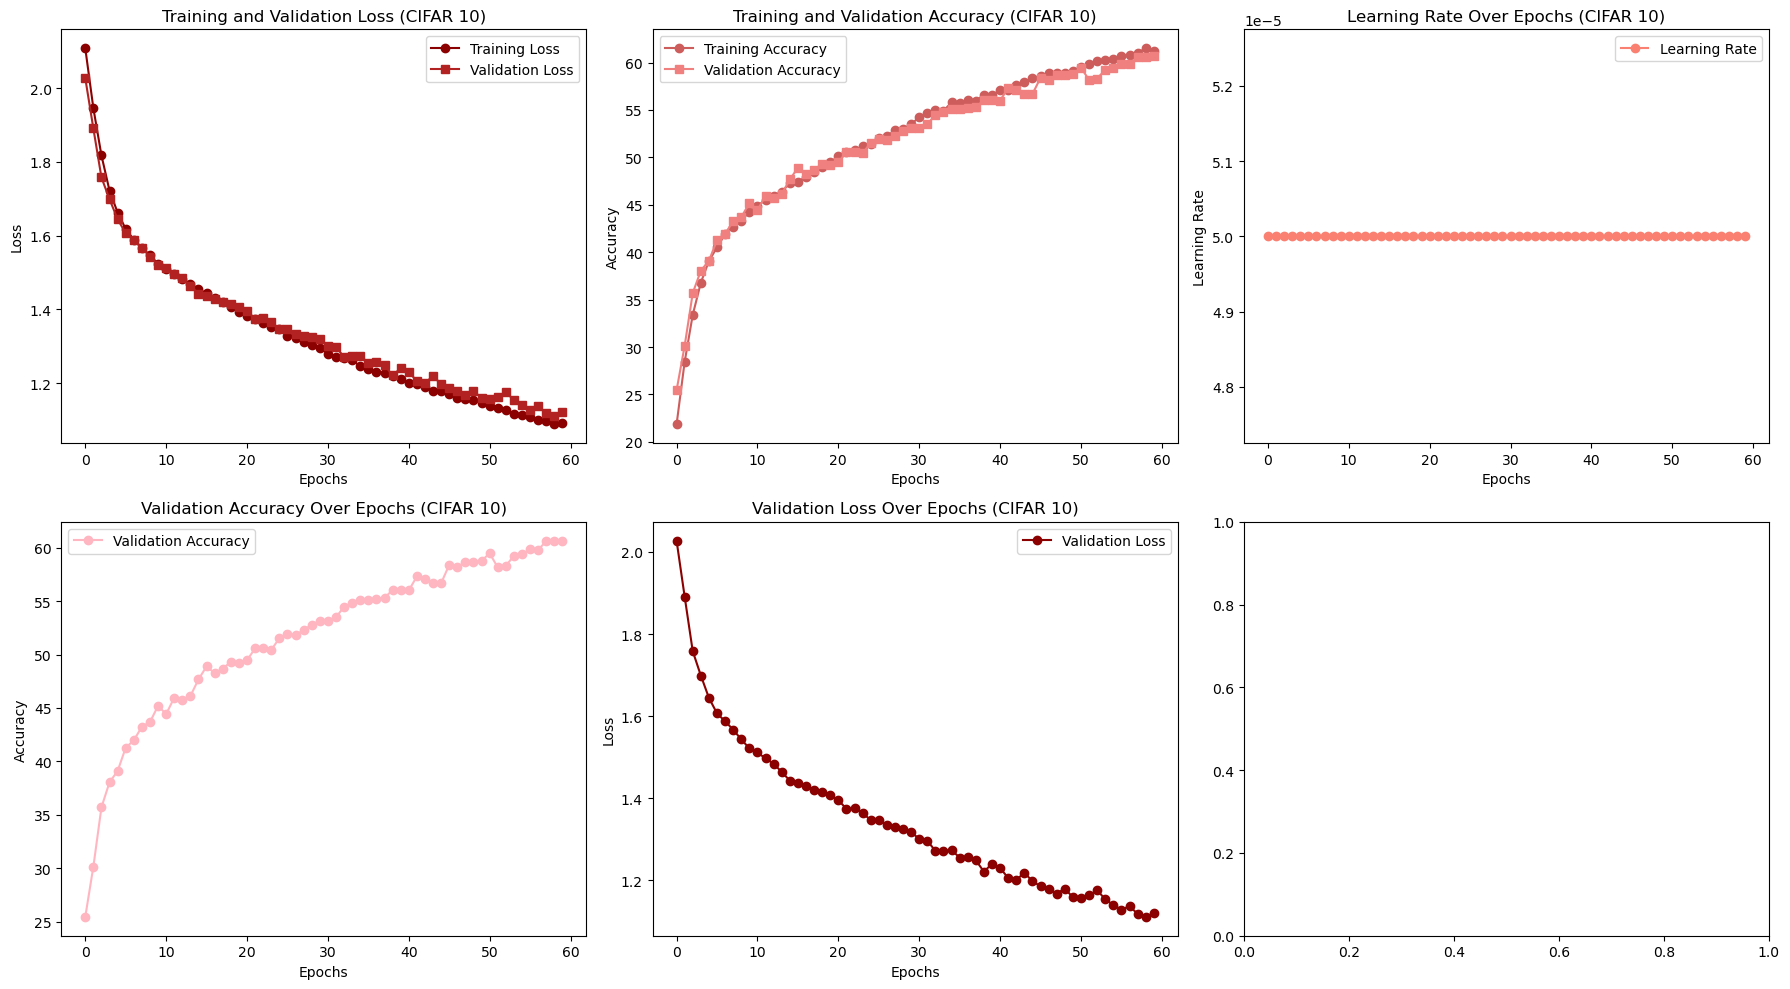

In [24]:
plot_training_metrics("secondmodel_cifar10_val_60_metrics.csv")

TODO: check why test accuracy in train() higher than in cross_validate()

### **Prediction of one class: Label mapping**

In [ ]:
label_mapping = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}
image_path = os.path.join(
    os.getcwd(), "..", "..", "data", "cifar", "test", "test_00.jpg"
)
net2.predict_single_image(image_path=image_path, label_mapping=label_mapping)

Predicted Class: ship


'ship'

In [6]:
image_path = os.path.join(
    os.getcwd(),
    "..",
    "..",
    "data",
    "tiny-imagenet-200",
    "tiny-imagenet-200",
    "test",
    "images",
    "test_50.JPEG",
)
net.predict_single_image(image_path=image_path, label_mapping=None)

Predicted Class: Class 132


### **Translating labels of Tiny Imagenet to text**

In [8]:
def load_tiny_imagenet_labels(data_dir):
    """
    Loads the Tiny ImageNet label mapping.

    Args:
        data_dir (str): Path to the Tiny ImageNet dataset folder.

    Returns:
        dict: A dictionary mapping class index to (WNID, class_name).
    """
    wnids_path = os.path.join(data_dir, "wnids.txt")
    words_path = os.path.join(data_dir, "words.txt")

    # Load WNIDs (200 labels)
    with open(wnids_path, "r") as f:
        wnids = [line.strip() for line in f.readlines()]

    # Load WordNet labels
    wnid_to_name = {}
    with open(words_path, "r") as f:
        for line in f:
            parts = line.strip().split("\t")
            wnid_to_name[parts[0]] = parts[1]  # Mapping WNID -> human-readable label

    # Create a class index mapping
    class_map = {
        i: (wnid, wnid_to_name.get(wnid, "Unknown")) for i, wnid in enumerate(wnids)
    }

    return class_map

In [9]:
test_dir = os.path.join(
    os.getcwd(), "..", "..", "data", "tiny-imagenet-200", "tiny-imagenet-200"
)
class_map = load_tiny_imagenet_labels(test_dir)
class_132 = class_map[132]
print(f"Class 132 → WNID: {class_132[0]}, Name: {class_132[1]}")

Class 132 → WNID: n04070727, Name: refrigerator, icebox


### **Find best predictions**

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image


def load_val_labels(val_annotations_path):
    """
    Loads validation image labels from val_annotations.txt.
    """
    val_labels = {}
    with open(val_annotations_path, "r") as f:
        for line in f:
            parts = line.strip().split("\t")
            img_name, wnid = parts[0], parts[1]  # Image filename → Class WNID
            val_labels[img_name] = wnid
    return val_labels


def find_best_predictions(
    model, val_dir, val_annotations_path, class_map, device, top_n=10
):
    """
    Finds validation images where the model makes correct, high-confidence predictions.

    Args:
        model (torch.nn.Module): Trained model.
        val_dir (str): Path to Tiny ImageNet validation images.
        val_annotations_path (str): Path to val_annotations.txt.
        class_map (dict): Mapping of class index to (WNID, class_name).
        device (torch.device): Device to run the model on (CPU/GPU).
        top_n (int): Number of best validation images to return.

    Returns:
        list: A list of (image_path, predicted_label, confidence_score).
    """
    model.eval()
    model.to(device)

    transform = transforms.Compose(
        [
            transforms.Resize((64, 64)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )

    val_labels = load_val_labels(val_annotations_path)
    correct_predictions = []

    for img_name in os.listdir(val_dir):
        img_path = os.path.join(val_dir, img_name)

        if img_name not in val_labels:
            continue  # Skip if the image is not in the annotations

        true_wnid = val_labels[img_name]  # Ground truth WNID

        # Load and preprocess image
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image)
            probabilities = torch.nn.functional.softmax(output, dim=1)
            confidence, pred_idx = torch.max(probabilities, dim=1)

        pred_idx = pred_idx.item()
        confidence = confidence.item()
        wnid, class_name = class_map.get(pred_idx, ("Unknown", "Unknown"))

        if true_wnid == wnid:
            correct_predictions.append((img_path, class_name, confidence))

    # Sort by highest confidence
    correct_predictions.sort(key=lambda x: x[2], reverse=True)

    return correct_predictions[:top_n]  # Return top N high-confidence images

In [ ]:
val_dir = os.path.join(
    os.getcwd(),
    "..",
    "..",
    "data",
    "tiny-imagenet-200",
    "tiny-imagenet-200",
    "val",
    "images",
)
val_annotations_path = os.path.join(
    os.getcwd(),
    "..",
    "..",
    "data",
    "tiny-imagenet-200",
    "tiny-imagenet-200",
    "val",
    "val_annotations.txt",
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_images = find_best_predictions(
    net.net, val_dir, val_annotations_path, class_map, device, top_n=5
)

for img_path, class_name, confidence in best_images:
    print(f"Image: {img_path} | Predicted: {class_name} | Confidence: {confidence:.2f}")